In [1]:
import pandas as pd
import numpy as np
import os
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from collections import Counter
# calculate a 5-number summary
from numpy import percentile

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
#Define logistic regression function
def logistic_regression(X, Y, attributes):
    log_reg = LogisticRegression(solver = "liblinear")    
    model = log_reg.fit(X, Y)

    coefficient     = model.coef_.tolist()  
    data = {
    "variable"     : attributes,
    "coefficient"  : coefficient[0]
    }
    coef_df = pd.DataFrame(data)

    coef_df = coef_df.sort_values(by= "coefficient", 
                    ascending= False).reset_index()
    return model , coef_df

#Define logistic regression function
def Linear_regression(X, Y):
    model = LinearRegression()    
    model = model.fit(X, Y)
    return model 
    

In [3]:
#Define logistic regression function
def logistic_regression(X, Y, attributes):
    log_reg = LogisticRegression(solver = "liblinear")    
    model = log_reg.fit(X, Y)

    coefficient     = model.coef_.tolist()  
    data = {
    "variable"     : attributes,
    "coefficient"  : coefficient[0]
    }
    coef_df = pd.DataFrame(data)

    coef_df = coef_df.sort_values(by= "coefficient", 
                    ascending= False).reset_index()
    return model , coef_df

#Define logistic regression function
def Linear_regression(X, Y):
    model = LinearRegression()    
    model = model.fit(X, Y)
    return model 
    

In [4]:
def cost(model, X, Y):
    Y_predicted = model.predict(X)
    return round((np.mean(Y_predicted != Y)), 4)

def Eval_metrics(model, X, Y):
    Y_predicted = model.predict(X)
    MSE         = mean_squared_error(Y, Y_predicted)
    r2_score_    = r2_score(Y, Y_predicted)
    return MSE, r2_score_

## YOY performance

#### Contract

In [5]:
data = pd.read_csv("capfiriendly_player_contracts_2020-21.csv")
data.head(1)

,Unnamed: 0,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,...,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,AAV,SALARY,BASE SALARY,MINORS,S.BONUS,P.BONUS
0,0,1. Connor McDavid,EDM,23,"Jan. 13, 1997",Canada,193 lbs - 88 kg,"6'1"" - 185 cm",C,Left,...,UFA,2026,"$12,500,000",16.70%,"$12,500,000",14000000,1000000,14000000,13000000,0


In [6]:
#Name is starting with number and then name, example - 1. Connor McDavid
data["Name"] = ["".join(data["PLAYER"][i].split(".")[1:]).strip() for i in range(len(data))]
data = data.drop_duplicates(subset=['Name'], keep='last')

In [7]:
data[data["Name"] == "Cory Schneider"]

,Unnamed: 0,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,...,EXP. YEAR,CAP HIT,CAP HIT %,AAV,SALARY,BASE SALARY,MINORS,S.BONUS,P.BONUS,Name
1331,31,1332. Cory Schneider,NYI,34,"Mar. 18, 1986",United States,200 lbs - 91 kg,"6'3"" - 191 cm",G,Left,...,2021,"$700,000",0.90%,"$700,000",700000,700000,700000,0,0,Cory Schneider


In [8]:
x = data["Name"].unique()

#### NHL Goalie Stats 2015-2022

In [9]:
df = pd.read_excel("NHL Goalie Stats 2015-2022.xlsx", header = 1)

In [10]:
df.head(2)

,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,Win,loss,Tie,Unnamed: 11,Unnamed: 12,POST,GP.1,GAA.1,SV%.1,SO.1,WLT
0,Andrei Vasilevsky,2015-16,Tampa Bay Lightning,NHL,24,2.76,0.91,1.0,11.0,10.0,0.0,NaN,|,Playoffs,8,2.76,0.925,0.0,2000-03-04 00:00:00
1,Andrei Vasilevsky,2016-17,Tampa Bay Lightning,NHL,50,2.61,0.917,2.0,23.0,17.0,7.0,NaN,|,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[df["Name"] == "Anton Khudobin"]

,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,Win,loss,Tie,Unnamed: 11,Unnamed: 12,POST,GP.1,GAA.1,SV%.1,SO.1,WLT
101,Anton Khudobin,2015-16,Anaheim Ducks,NHL,9,2.69,0.909,1.0,3.0,NaN,NaN,NaN,|,NaN,NaN,NaN,NaN,NaN,NaN
102,Anton Khudobin,2016-17,Boston Bruins,NHL,16,2.64,0.904,0.0,7.0,NaN,NaN,NaN,|,NaN,NaN,NaN,NaN,NaN,NaN
103,Anton Khudobin,2017-18,Boston Bruins,NHL,31,2.56,0.913,1.0,16.0,6.0,7.0,NaN,|,Playoffs,1,0,1,0.0,0-0-0
104,Anton Khudobin,2018-19,Dallas Stars,NHL,41,2.57,0.923,2.0,16.0,17.0,5.0,NaN,|,Playoffs,1,0,1,0.0,0-0-0
105,Anton Khudobin,2019-20,Dallas Stars,NHL,30,2.22,0.93,0.0,16.0,8.0,4.0,NaN,|,Playoffs,25,2.69,0.917,1.0,14-10-0
106,Anton Khudobin,2020-21,Dallas Stars,NHL,32,2.54,0.905,3.0,12.0,11.0,7.0,NaN,|,NaN,NaN,NaN,NaN,NaN,NaN
107,Anton Khudobin,2021-22,Dallas Stars,NHL,9,3.63,0.879,0.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Merge Contract and NHL goalie stats

In [12]:
merge = df.merge(data, on = "Name", how = "left")

In [13]:
merge.head(2)

,Name,Year,TEAM_x,LEAGUE,GP_x,GAA_x,SV%,SO_x,Win,loss,...,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,AAV,SALARY,BASE SALARY,MINORS,S.BONUS,P.BONUS
0,Andrei Vasilevsky,2015-16,Tampa Bay Lightning,NHL,24,2.76,0.91,1.0,11.0,10.0,...,UFA,2028.0,"$9,500,000",11.70%,"$9,500,000",12000000.0,3500000.0,12000000.0,8500000.0,0.0
1,Andrei Vasilevsky,2016-17,Tampa Bay Lightning,NHL,50,2.61,0.917,2.0,23.0,17.0,...,UFA,2028.0,"$9,500,000",11.70%,"$9,500,000",12000000.0,3500000.0,12000000.0,8500000.0,0.0


In [14]:
merge[merge["Name"] == "Cory Schneider"]

merge[ merge["Name"] == "Anton Khudobin" ]

,Name,Year,TEAM_x,LEAGUE,GP_x,GAA_x,SV%,SO_x,Win,loss,...,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,AAV,SALARY,BASE SALARY,MINORS,S.BONUS,P.BONUS
101,Anton Khudobin,2015-16,Anaheim Ducks,NHL,9,2.69,0.909,1.0,3.0,NaN,...,UFA,2023.0,"$3,333,333",4.10%,"$3,333,333",2500000.0,2500000.0,2500000.0,0.0,0.0
102,Anton Khudobin,2016-17,Boston Bruins,NHL,16,2.64,0.904,0.0,7.0,NaN,...,UFA,2023.0,"$3,333,333",4.10%,"$3,333,333",2500000.0,2500000.0,2500000.0,0.0,0.0
103,Anton Khudobin,2017-18,Boston Bruins,NHL,31,2.56,0.913,1.0,16.0,6.0,...,UFA,2023.0,"$3,333,333",4.10%,"$3,333,333",2500000.0,2500000.0,2500000.0,0.0,0.0
104,Anton Khudobin,2018-19,Dallas Stars,NHL,41,2.57,0.923,2.0,16.0,17.0,...,UFA,2023.0,"$3,333,333",4.10%,"$3,333,333",2500000.0,2500000.0,2500000.0,0.0,0.0
105,Anton Khudobin,2019-20,Dallas Stars,NHL,30,2.22,0.93,0.0,16.0,8.0,...,UFA,2023.0,"$3,333,333",4.10%,"$3,333,333",2500000.0,2500000.0,2500000.0,0.0,0.0
106,Anton Khudobin,2020-21,Dallas Stars,NHL,32,2.54,0.905,3.0,12.0,11.0,...,UFA,2023.0,"$3,333,333",4.10%,"$3,333,333",2500000.0,2500000.0,2500000.0,0.0,0.0
107,Anton Khudobin,2021-22,Dallas Stars,NHL,9,3.63,0.879,0.0,3.0,4.0,...,UFA,2023.0,"$3,333,333",4.10%,"$3,333,333",2500000.0,2500000.0,2500000.0,0.0,0.0


##### Back to NHL goalie stats 

In [15]:
df = df.dropna(subset=['Name', 'Year']).reset_index()


In [16]:
# df["Duplicate_true_false"] = df["Name"].duplicated().to_list()
# #create number of years played
# number_of_years = []
# for i in range(len(df)):

#     if int(df["Duplicate_true_false"][i]) ==  0:
#         count = 1
#     else:
#         count += 1
        
#     number_of_years.append(count)
              
# df["number_of_years_played"] = number_of_years

In [17]:
df.columns

Index(['index', 'Name', 'Year', 'TEAM', 'LEAGUE', 'GP', 'GAA', 'SV%', 'SO',
       'Win', 'loss', 'Tie', 'Unnamed: 11', 'Unnamed: 12', 'POST', 'GP.1',
       'GAA.1', 'SV%.1', 'SO.1', 'WLT'],
      dtype='object')

In [18]:
df_1 = df[['Name', 'Year', 'TEAM', 'LEAGUE', 'GP', 'GAA', 'SV%', 'SO',
       'Win', 'loss', 'Tie']]

In [19]:
df_1[df_1["Name"] == "Anton Khudobin"]

,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,Win,loss,Tie
74,Anton Khudobin,2015-16,Anaheim Ducks,NHL,9,2.69,0.909,1.0,3.0,NaN,NaN
75,Anton Khudobin,2016-17,Boston Bruins,NHL,16,2.64,0.904,0.0,7.0,NaN,NaN
76,Anton Khudobin,2017-18,Boston Bruins,NHL,31,2.56,0.913,1.0,16.0,6.0,7.0
77,Anton Khudobin,2018-19,Dallas Stars,NHL,41,2.57,0.923,2.0,16.0,17.0,5.0
78,Anton Khudobin,2019-20,Dallas Stars,NHL,30,2.22,0.93,0.0,16.0,8.0,4.0
79,Anton Khudobin,2020-21,Dallas Stars,NHL,32,2.54,0.905,3.0,12.0,11.0,7.0
80,Anton Khudobin,2021-22,Dallas Stars,NHL,9,3.63,0.879,0.0,3.0,4.0,1.0


In [20]:
df_1.head(5)

,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,Win,loss,Tie
0,Andrei Vasilevsky,2015-16,Tampa Bay Lightning,NHL,24,2.76,0.91,1.0,11.0,10.0,0.0
1,Andrei Vasilevsky,2016-17,Tampa Bay Lightning,NHL,50,2.61,0.917,2.0,23.0,17.0,7.0
2,Andrei Vasilevsky,2017-18,Tampa Bay Lightning,NHL,65,2.62,0.92,8.0,44.0,17.0,3.0
3,Andrei Vasilevsky,2018-19,Tampa Bay Lightning,NHL,53,2.4,0.925,6.0,39.0,10.0,4.0
4,Andrei Vasilevsky,2019-20,Tampa Bay Lightning,NHL,52,2.56,0.917,3.0,35.0,14.0,3.0


In [21]:
df_1["TEAM"] = df_1["TEAM"].str.strip()

/var/folders/fb/_6hrjjyn15ddlv17bfxm6h6m0000gn/T/ipykernel_63498/844179456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["TEAM"] = df_1["TEAM"].str.strip()


### Age 

In [22]:
age_data = pd.read_csv("goalkeeper_name.csv")
age_data = age_data.drop_duplicates(subset=['Name', 'Year'], keep='last')


In [23]:
age_data[age_data["Name"] == "Cory Schneider"]

,Unnamed: 0,Year,Name,age,Age_
213,213,2015-16,Cory Schneider,28,28
215,215,2016-17,Cory Schneider,29,29
217,217,2017-18,Cory Schneider,30,30
219,219,2018-19,Cory Schneider,31,31
221,221,2019-20,Cory Schneider,32,32
223,223,2020-21,Cory Schneider,33,33
225,225,2021-22,Cory Schneider,34,34


##### 1. linear model - SV% prediction 
##### 2. logistic regression model - SV% prediction > .917 then 0 else 1


In [24]:
# team = pd.get_dummies(df_1["TEAM"])

### Get Age

In [25]:
# df_1 = pd.merge(left = df, right = team, left_index= True, right_index = True)

df_1 = df.merge(age_data, on = ["Name", "Year"])
df_1 = df_1[df_1["Age_"] > 0]
df_1.head(2)

,index,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,Win,...,Unnamed: 12,POST,GP.1,GAA.1,SV%.1,SO.1,WLT,Unnamed: 0,age,Age_
0,0,Andrei Vasilevsky,2015-16,Tampa Bay Lightning,NHL,24,2.76,0.91,1.0,11.0,...,|,Playoffs,8,2.76,0.925,0.0,2000-03-04 00:00:00,0,21,21
1,1,Andrei Vasilevsky,2016-17,Tampa Bay Lightning,NHL,50,2.61,0.917,2.0,23.0,...,|,NaN,NaN,NaN,NaN,NaN,NaN,1,22,22


In [26]:
np.median(df['Win'].dropna())

9.0

##### Replace rows with nan 

In [27]:
df_1.to_csv("temp.csv")

In [28]:

df_1["GP"] = np.where(df_1['GP'] == "-", 0, df_1["GP"])
df_2 = df_1.dropna(subset =["Win", "loss", "Tie"]).reset_index()

# df_1['Win'] = df_1['Win'].replace(np.nan, np.median(df_1['Win'].dropna()))
# df_1['loss'] = df_1['loss'].replace(np.nan, np.median(df_1['loss'].dropna()))
# df_1['Tie'] = df_1['Tie'].replace(np.nan, np.median(df_1['Tie'].dropna()))


In [29]:
#get class 

df_2["class"] = [1 if float(df_2["SV%"][i]) >= .917 else 0 for i in range(len(df_2))]
df_2["class"].value_counts()

0    317
1    157
Name: class, dtype: int64

In [30]:
df_2["Duplicate_true_false"] = df_2["Name"].duplicated().to_list()
#create number of years played
number_of_years = []
for i in range(len(df_2)):

    if int(df_2["Duplicate_true_false"][i]) ==  0:
        count = 1
    else:
        count += 1
        
    number_of_years.append(count)
              
df_2["number_of_years_played"] = number_of_years

In [31]:
df_2.to_csv("NHL_data_with_age.csv")

In [32]:
df_2[df_2["Name"] == "Chris Driedger"]

,level_0,index,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,...,GAA.1,SV%.1,SO.1,WLT,Unnamed: 0,age,Age_,class,Duplicate_true_false,number_of_years_played
132,174,250,Chris Driedger,2015-16,Ottawa Senators,NHL,1,0,1,0.0,...,NaN,NaN,NaN,NaN,183,22,22,1,False,1
133,175,251,Chris Driedger,2016-17,Ottawa Senators,NHL,1,6,0.733,0.0,...,NaN,NaN,NaN,NaN,184,23,23,0,True,2
134,176,252,Chris Driedger,2019-20,Florida Panthers,NHL,12,2.05,0.938,1.0,...,NaN,NaN,NaN,NaN,185,26,26,1,True,3
135,177,253,Chris Driedger,2020-21,Florida Panthers,NHL,23,2.07,0.927,3.0,...,3.69,0.871,0.0,0-1-0,186,27,27,1,True,4
136,178,254,Chris Driedger,2021-22,Seattle Kraken,NHL,15,3.3,0.893,0.0,...,NaN,NaN,NaN,NaN,187,28,28,0,True,5


In [33]:
# df_1.columns

In [34]:
#Question - what is SO?

X = df_2[['GP' ,
#           'Win', 
          'loss', 'Tie', 'number_of_years_played',
          'SO'
          ,
          'Age_'
#           , 
#           'Anaheim Ducks', 'Arizona Coyotes',
#        'Boston Bruins', 'Buffalo Sabres', 'Calgary Flames',
#        'Carolina Hurricanes', 'Chicago Blackhawks', 'Colorado Avalanche',
#        'Columbus Blue Jackets', 'Dallas Stars', 'Detroit Red Wings',
#        'Edmonton Oilers', 'Florida Panthers', 'Los Angeles Kings',
#        'Minnesota Wild', 'Montréal Canadiens', 'Nashville Predators',
#        'New Jersey Devils', 'New York Islanders', 'New York Rangers',
#        'Ottawa Senators', 'Philadelphia Flyers', 'Pittsburgh Penguins',
#        'San Jose Sharks', 'Seattle Kraken', 'St. Louis Blues',
#        'Tampa Bay Lightning', 'Toronto Maple Leafs', 'Vancouver Canucks',
#        'Vegas Golden Knights', 'Washington Capitals', 'Winnipeg Jets'
         ]]

Y = list(df_2["SV%"])

In [35]:
X.isnull().sum()

GP                        0
loss                      0
Tie                       0
number_of_years_played    0
SO                        0
Age_                      0
dtype: int64

In [36]:
# #Split into test and train
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled  = scaler.transform(X_test)

# model = Linear_regression(X_train_scaled, Y_train)
# Eval_metrics(model, X_train_scaled, Y_train)
# Eval_metrics(model, X_test_scaled, Y_test)

#### Logistic regression

In [37]:

Y = list(df_2["class"])

#Split into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Classes in train data", Counter(Y_train))
print("Classes in test data", Counter(Y_test))

attributes = X_train.columns

model, df  = logistic_regression(X_train, Y_train, attributes)
df

print("Train Accuracy:", round(1 - cost(model, X_train, Y_train), 2))
print("Test Accuracy:", round(1 - cost(model, X_test, Y_test),2))

Classes in train data Counter({0: 157, 1: 80})
Classes in test data Counter({0: 160, 1: 77})
Train Accuracy: 0.78
Test Accuracy: 0.74


In [38]:
df

,index,variable,coefficient
0,4,SO,0.717475
1,0,GP,0.096487
2,5,Age_,-0.009511
3,2,Tie,-0.237897
4,1,loss,-0.253292
5,3,number_of_years_played,-0.352660


In [39]:
df_2.head(2)

,level_0,index,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,...,GAA.1,SV%.1,SO.1,WLT,Unnamed: 0,age,Age_,class,Duplicate_true_false,number_of_years_played
0,0,0,Andrei Vasilevsky,2015-16,Tampa Bay Lightning,NHL,24,2.76,0.91,1.0,...,2.76,0.925,0.0,2000-03-04 00:00:00,0,21,21,0,False,1
1,1,1,Andrei Vasilevsky,2016-17,Tampa Bay Lightning,NHL,50,2.61,0.917,2.0,...,NaN,NaN,NaN,NaN,1,22,22,1,True,2


## Model 

In [40]:

def Models(df, number_of_years):
    df_year_1 = df[df["number_of_years_played"] == number_of_years]
     
    X = df_year_1[['GP' ,'Win', 'loss', 'Tie', 'number_of_years_played','SO', 'Age_']]
    Y = list(df_year_1["class"])
    
    #Split into test and train
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    print(number_of_years, "Classes in train data", Counter(Y_train))
    print(number_of_years, "Classes in test data", Counter(Y_test))
    
    attributes = X_train.columns
    
    model, df  = logistic_regression(X_train, Y_train, attributes)
    print("Train Accuracy:", round(1 - cost(model, X_train, Y_train), 2))
    print("Test Accuracy:", round(1 - cost(model, X_test, Y_test),2))
    

    return model, df


In [41]:
model, df0 = Models(df_2, 1)


1 Classes in train data Counter({0: 39, 1: 35})
1 Classes in test data Counter({0: 19, 1: 13})
Train Accuracy: 0.66
Test Accuracy: 0.72


In [42]:
model, df1 = Models(df_2, 2)
df1

df0 = df0.merge(df1, on = "variable", how = "left")

2 Classes in train data Counter({0: 41, 1: 25})
2 Classes in test data Counter({0: 16, 1: 13})
Train Accuracy: 0.8
Test Accuracy: 0.79


In [43]:
model, df2 = Models(df_2, 3)
df2
df0 = df0.merge(df2, on = "variable", how = "left")

3 Classes in train data Counter({0: 38, 1: 16})
3 Classes in test data Counter({0: 15, 1: 9})
Train Accuracy: 0.8
Test Accuracy: 0.79


In [44]:
model, df3 = Models(df_2, 4)
df3
df0 = df0.merge(df3, on = "variable", how = "left")

4 Classes in train data Counter({0: 34, 1: 12})
4 Classes in test data Counter({0: 15, 1: 5})
Train Accuracy: 0.89
Test Accuracy: 0.8


In [45]:
model, df4 = Models(df_2, 5)
df4
df0 = df0.merge(df4, on = "variable", how = "left")

5 Classes in train data Counter({0: 32, 1: 7})
5 Classes in test data Counter({0: 13, 1: 4})
Train Accuracy: 0.92
Test Accuracy: 0.82


In [46]:
df0

,index_x,variable,coefficient_x,index_y,coefficient_y,index_x,coefficient_x,index_y,coefficient_y,index,coefficient
0,4,number_of_years_played,0.511476,4,-0.766813,4,-0.530322,4,-0.193561,4,-0.212186
1,5,SO,0.167290,5,0.003863,5,1.188477,5,1.268654,5,-0.106876
2,0,GP,0.107954,0,-0.539816,0,0.335489,0,0.059930,0,-0.187663
3,1,Win,0.001299,1,0.664591,1,-0.333111,1,-0.000198,1,0.642808
4,6,Age_,-0.063087,6,0.080041,6,0.030689,6,-0.076048,6,-0.023988
5,2,loss,-0.180339,2,0.282562,2,-0.511352,2,-0.219328,2,-0.070715
6,3,Tie,-0.313534,3,0.859165,3,-0.588315,3,-0.032834,3,-0.832438


### K- means 

In [47]:
df_2[df_2["Name"] == "Cory Schneider"]

,level_0,index,Name,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,...,GAA.1,SV%.1,SO.1,WLT,Unnamed: 0,age,Age_,class,Duplicate_true_false,number_of_years_played
153,203,291,Cory Schneider,2015-16,New Jersey Devils,NHL,58,2.15,0.924,4.0,...,NaN,NaN,NaN,NaN,213,28,28,1,False,1
154,204,292,Cory Schneider,2016-17,New Jersey Devils,NHL,60,2.82,0.908,2.0,...,NaN,NaN,NaN,NaN,215,29,29,0,True,2
155,205,293,Cory Schneider,2017-18,New Jersey Devils,NHL,40,2.93,0.907,1.0,...,1.78,0.95,0.0,2000-01-02 00:00:00,217,30,30,0,True,3
156,206,294,Cory Schneider,2018-19,New Jersey Devils,NHL,26,3.06,0.903,1.0,...,NaN,NaN,NaN,NaN,219,31,31,0,True,4
157,207,295,Cory Schneider,2019-20,New Jersey Devils,NHL,13,3.53,0.887,1.0,...,NaN,NaN,NaN,NaN,221,32,32,0,True,5


In [48]:
Name_played_5Year = df_2[df_2["number_of_years_played"] == 5]
len(Name_played_5Year)

56

### Get the information about number of hours in the 

In [49]:
#use the glob to get all the csv files
import os
import glob
path = os.getcwd()
path = "/Users/ruksanakhan/Documents/Research/Spring 2022/Goalkeeper level excel"
excel_files = glob.glob(os.path.join(path, "*.xls"))
# print(excel_files)

#Loop over the list of csv files
column_name = ["JN", "Name", "Time on ice", "Goals against", "Shots on target", "Saves"]
df_number_ice = pd.DataFrame(columns = column_name)
for f in excel_files:
    df_temp = pd.read_excel(f)
    df_temp.columns = column_name
    df_number_ice = df_number_ice.append(df_temp, ignore_index = True)

    df_number_ice.to_csv("df.csv")
len(df_number_ice.Name.unique())


#Data cleaning
df_number_ice[["Time on ice min", "Time on ice second"]]= df_number_ice["Time on ice"].str.split(":", expand = True)
df_number_ice[["Shots on target", "Time on ice min", "Time on ice second"]] = df_number_ice[["Shots on target", "Time on ice min", "Time on ice second"]].apply(pd.to_numeric)
df_number_ice["Goals against"] = pd.to_numeric(df_number_ice["Goals against"], errors = "coerce")
df_number_ice["Saves"] = pd.to_numeric(df_number_ice["Saves"], errors = "coerce")


#covert Nan
df_number_ice = df_number_ice.replace(np.nan, 0)



In [50]:
#Aggregate the data

df_number_ice = df_number_ice.groupby("Name").sum()

df_number_ice = df_number_ice.reset_index()

In [51]:
df_number_ice.head(2)

,Name,JN,Goals against,Shots on target,Saves,Time on ice min,Time on ice second
0,Aaron Dell,127.0,60.0,477,417.0,884,34
1,Adam Huska,32.0,8.0,58,50.0,59,44


In [52]:
#Merge the data to get time on ICE

In [53]:
Name_played_5Year = Name_played_5Year.merge(df_number_ice, how = "left", on = "Name")

In [54]:
Name_played_5Year = Name_played_5Year[Name_played_5Year["Time on ice min"] >= 7000]

In [55]:
Name_played_5Year = Name_played_5Year[["Name"]]

In [56]:
Name_played_5Year.head(2)

,Name
8,Anton Khudobin
9,Antti Raanta


In [57]:
#get all of the entry
df_year_5 = Name_played_5Year.merge(df_2, on= "Name", how = "left")

df_year_5 = df_year_5[df_year_5["number_of_years_played"] <= 5]

#To check the duplicate
df_year_5[ df_year_5["Name"] == "Curtis McElhinney" ]


,Name,level_0,index,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,...,GAA.1,SV%.1,SO.1,WLT,Unnamed: 0,age,Age_,class,Duplicate_true_false,number_of_years_played


In [58]:
df_year_5 = df_year_5.reset_index(drop = True)


In [59]:
df_year_5.head(5)

,Name,level_0,index,Year,TEAM,LEAGUE,GP,GAA,SV%,SO,...,GAA.1,SV%.1,SO.1,WLT,Unnamed: 0,age,Age_,class,Duplicate_true_false,number_of_years_played
0,Anton Khudobin,75,103,2017-18,Boston Bruins,NHL,31,2.56,0.913,1.0,...,0,1,0.0,0-0-0,78,31,31,0,False,1
1,Anton Khudobin,76,104,2018-19,Dallas Stars,NHL,41,2.57,0.923,2.0,...,0,1,0.0,0-0-0,79,32,32,1,True,2
2,Anton Khudobin,77,105,2019-20,Dallas Stars,NHL,30,2.22,0.93,0.0,...,2.69,0.917,1.0,14-10-0,80,33,33,1,True,3
3,Anton Khudobin,78,106,2020-21,Dallas Stars,NHL,32,2.54,0.905,3.0,...,NaN,NaN,NaN,NaN,81,34,34,0,True,4
4,Anton Khudobin,79,107,2021-22,Dallas Stars,NHL,9,3.63,0.879,0.0,...,NaN,NaN,NaN,NaN,82,35,35,0,True,5


In [169]:
df_year_5.shape

(150, 28)

In [60]:
#Save percent unique value and count 
x = pd.DataFrame(df_year_5["SV%"].value_counts())
x.to_csv("x.csv")

In [61]:
# calculate quartiles
quartiles = percentile(df_year_5["SV%"], [25, 50, 75])
# calculate min/max
data_min, data_max = df_year_5["SV%"].min(), df_year_5["SV%"].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.750
Q1: 0.907
Median: 0.915
Q3: 0.920
Max: 0.934


In [171]:
min_ = 0.907
max_ = 0.920
by = (max_ - min_)/4
min_, (min_ + by), (min_ + 2*by), (min_ + 3*by), (min_ + 4*by)

(0.907, 0.91025, 0.9135, 0.9167500000000001, 0.92)

### Histogram of the SV%

<AxesSubplot:xlabel='SV%', ylabel='Count'>

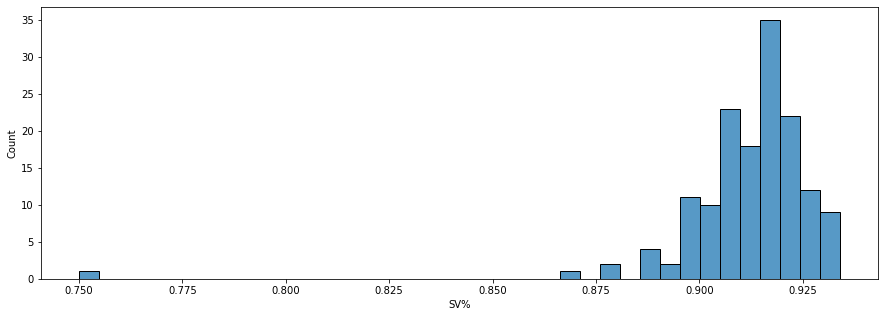

In [63]:
fig = plt.subplots(figsize = (15, 5))
sns.histplot(data = df_year_5, x = "SV%")


### Goalkeeper behavior

In [64]:
x_ = []

min_ = 0.907
max_ = 0.934
by = 0.003250000000000003

for i in range(len(df_year_5)):
    if df_year_5["SV%"][i] <= min_:
#         x = "<= .79"
        x = 1
    elif df_year_5["SV%"][i] > min_ and df_year_5["SV%"][i] <= (min_ + by):
#         x = "0.79-0.83"
        x = 2
    elif df_year_5["SV%"][i] > (min_ + by) and df_year_5["SV%"][i] <= (min_ + 2*by):
#         x = "0.83-0.87"    
        x = 3
    elif df_year_5["SV%"][i] > (min_ + 2*by) and df_year_5["SV%"][i] <= (min_ + 3*by):
#         x = "0.87-0.917"    
        x = 4
    elif df_year_5["SV%"][i] > (min_ + 3*by) and df_year_5["SV%"][i] <= max_:
#         x = "0.87-0.917"  
        x = 5
    else:
#         x = ">.96"
        x = 6
    x_.append(x)

df_year_5["SV_percent_bucket"] = x_

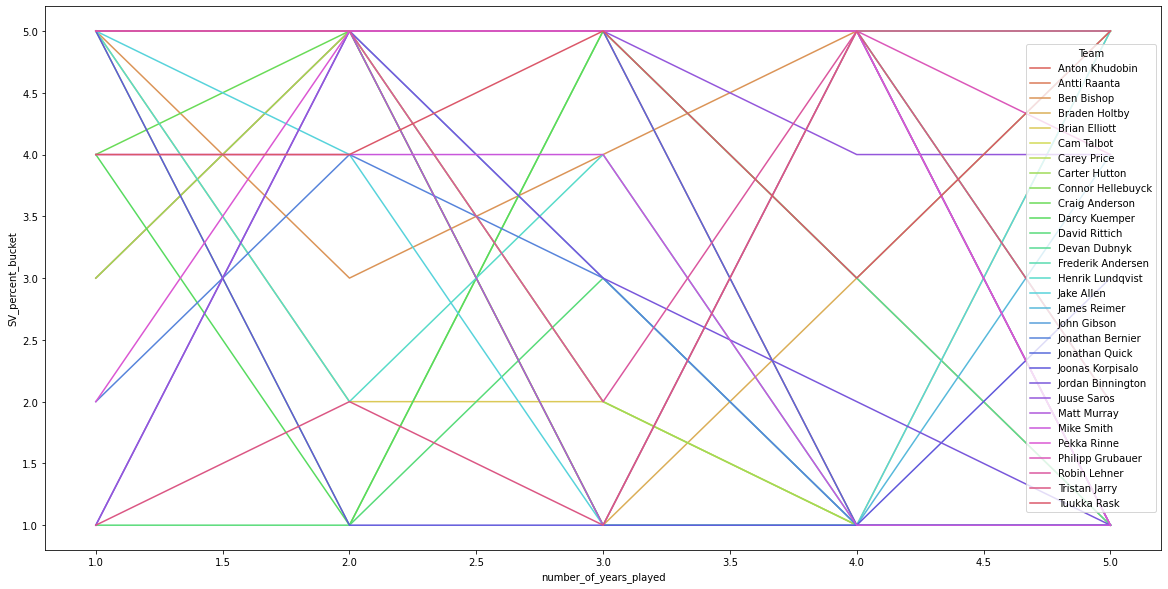

In [65]:
fig = plt.subplots(figsize = (20, 10))
sns.lineplot(data = df_year_5, 
             x = "number_of_years_played", 
             y = "SV_percent_bucket", 
             hue = "Name",
             palette = 'hls')
#place legend in center right of plot
plt.legend(loc='center right', title='Team')

# fig = plt.subplots(figsize = (15, 15))
# sns.lineplot(data = df_year_5, x = "SV%", y = "number_of_years_played", hue = "Name")


In [66]:
# unique_names

### Hamming distance

In [111]:
#Patter for hamming distance

x = pd.DataFrame(df_year_5["Name"].value_counts())
x.reset_index(inplace=True)
unique_names = x.rename(columns = {'index':'name'})
name = list(unique_names['name'])

hamming_pattern = []
for i in range(len(name)):
    temp = df_year_5[df_year_5["Name"] == name[i]]
    hamming_pattern.append(list(temp["SV_percent_bucket"]))
    
unique_names["SV_pattern"] = hamming_pattern

In [112]:
# unique_names.to_csv("Hamming_dist.csv")
# for i in range(len(unique_names)):
#     temp = []
#     if unique_names["name"][i] == name[i]:
#         for j in range(len(unique_names)):
#             dist = hamming(unique_names['SV_pattern'][i], unique_names['SV_pattern'][j])
#             temp.append(dist)
# #         print(len(temp), len(unique_names))
#         unique_names[name[i]] = temp
            
# unique_names.to_csv("Hamming_dist.csv")         

In [113]:
X = list(unique_names["SV_pattern"])
X = np.array(X)


In [114]:
def hamming_distance(u, v):
#     print(np.linalg.norm((u-v)))
    return np.linalg.norm((u-v))

In [115]:
from nltk.cluster.kmeans import KMeansClusterer
import nltk

NUM_CLUSTERS = 5
data1 = X

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=hamming_distance, repeats=25)
Hamming_cluster = kclusterer.cluster(data1, assign_clusters=True)
# kclusterer.means()

In [116]:
unique_names['Hamming_cluster'] = Hamming_cluster
unique_names['centroid'] = unique_names['Hamming_cluster'].apply(lambda x: kclusterer.means()[x])


### euclidean distance

In [117]:
x = pd.DataFrame(df_year_5["Name"].value_counts())
x.reset_index(inplace=True)
unique_names = x.rename(columns = {'index':'name'})
name = list(unique_names['name'])

pattern = []
for i in range(len(name)):
    temp = df_year_5[df_year_5["Name"] == name[i]]
    pattern.append(list(temp["SV%"]))
    
unique_names["SV_pattern"] = pattern

#get the SV% data 
columns=['Year1', 'Year2', 'Year3', 'Year4', 'Year5']
unique_names[columns] = pd.DataFrame(unique_names["SV_pattern"].to_list())

#Final data 
X = unique_names[['Year1', 'Year2', 'Year3', 'Year4', 'Year5']]

In [118]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.cluster_centers_

array([[0.91933333, 0.91511111, 0.91933333, 0.91933333, 0.91933333],
       [0.75      , 0.927     , 0.912     , 0.91      , 0.904     ],
       [0.91888235, 0.91917647, 0.91252941, 0.90564706, 0.90129412],
       [0.88333333, 0.91166667, 0.90766667, 0.91433333, 0.909     ]])

In [119]:
unique_names['cluster'] = kmeans.predict(X)

unique_names = unique_names.drop(columns = {'Name'})
unique_names = unique_names.rename(columns = {'name':'Name'})

In [120]:
unique_names.to_csv("Kmeans_cluster.csv")
type(unique_names)

pandas.core.frame.DataFrame

In [121]:
# unique_names['cluster'].value_counts()

In [122]:
# unique_names[unique_names['cluster'] == 0]
# unique_names

In [123]:
unique_names["Hamming_cluster"] = Hamming_cluster
unique_names["hamming_pattern"] = hamming_pattern

In [124]:
unique_names["Hamming_cluster"].value_counts()

3    10
1     7
2     5
0     4
4     4
Name: Hamming_cluster, dtype: int64

In [128]:
# unique_names[unique_names['Hamming_cluster'] == 3]


In [148]:
unique_names[['Name', 'SV_pattern',
       'cluster', 'hamming_pattern', 'Hamming_cluster']]

,Name,SV_pattern,cluster,hamming_pattern,Hamming_cluster
0,Carter Hutton,"[0.913, 0.931, 0.908, 0.898, 0.886]",2,"[3, 5, 2, 1, 1]",1
1,Devan Dubnyk,"[0.918, 0.923, 0.918, 0.913, 0.89]",2,"[5, 5, 5, 3, 1]",3
2,Juuse Saros,"[0.87, 0.923, 0.925, 0.915, 0.914]",3,"[1, 5, 5, 4, 4]",3
3,Matt Murray,"[0.93, 0.923, 0.907, 0.919, 0.899]",2,"[5, 5, 1, 5, 1]",3
4,Joonas Korpisalo,"[0.92, 0.905, 0.897, 0.897, 0.911]",2,"[5, 1, 1, 1, 3]",1
5,Frederik Andersen,"[0.919, 0.918, 0.918, 0.917, 0.909]",0,"[5, 5, 5, 5, 2]",3
6,Pekka Rinne,"[0.908, 0.918, 0.927, 0.918, 0.895]",2,"[2, 5, 5, 5, 1]",3
7,Anton Khudobin,"[0.913, 0.923, 0.93, 0.905, 0.879]",2,"[3, 5, 5, 1, 1]",3
8,Darcy Kuemper,"[0.915, 0.902, 0.932, 0.925, 0.928]",0,"[4, 1, 5, 5, 5]",4
9,Jonathan Bernier,"[0.908, 0.915, 0.913, 0.904, 0.907]",2,"[2, 4, 3, 1, 1]",0


#### Salary data for players

In [149]:
unique_names_median = unique_names.merge(data ,  on = "Name", how = "left")

In [150]:
unique_names_median = unique_names_median[['Name', 'SV_pattern','cluster', 'hamming_pattern', 
                                           'Hamming_cluster',
                                           'cluster', 'CAP HIT %', 'SALARY', 'S.BONUS']]



In [151]:
# calculate quartiles
quartiles = percentile(unique_names_median["SALARY"], [25, 50, 75])
# calculate min/max
data_min, data_max = unique_names_median["SALARY"].min(), unique_names_median["SALARY"].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 700000.000
Q1: 2500000.000
Median: 3050000.000
Q3: 4000000.000
Max: 9750000.000


In [152]:
unique_names_median['SALARY'].value_counts()

4000000    5
2500000    4
1500000    4
3500000    3
2750000    3
9750000    1
2200000    1
4250000    1
2900000    1
3100000    1
3000000    1
6400000    1
6500000    1
4500000    1
5000000    1
700000     1
Name: SALARY, dtype: int64

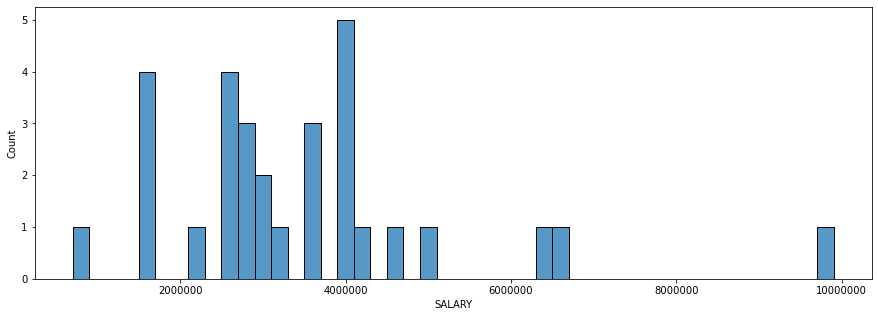

In [153]:
fig = plt.subplots(figsize = (15, 5))
sns.histplot(data = unique_names_median, x = "SALARY",  binwidth=200000)
plt.ticklabel_format(style='plain', axis='x')

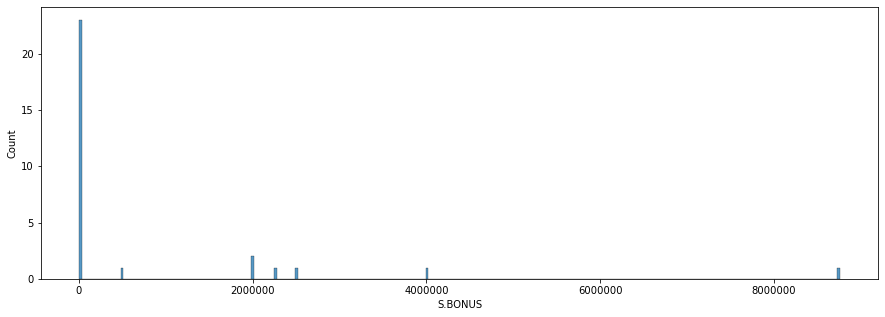

In [154]:
fig = plt.subplots(figsize = (15, 5))
sns.histplot(data = unique_names_median, x = "S.BONUS", binwidth=30000)
plt.ticklabel_format(style='plain', axis='x')

In [155]:
unique_names_median['S.BONUS'].value_counts()

0          23
2000000     2
2250000     1
4000000     1
8750000     1
2500000     1
500000      1
Name: S.BONUS, dtype: int64

In [161]:
unique_names_median = unique_names_median.reset_index()

In [165]:
unique_names_median["Hamming_cluster"].value_counts()

3    10
1     7
2     5
0     4
4     4
Name: Hamming_cluster, dtype: int64

In [167]:
unique_names_median[unique_names_median['Hamming_cluster'] >= 0]

,index,Name,SV_pattern,cluster,hamming_pattern,Hamming_cluster,cluster,CAP HIT %,SALARY,S.BONUS
0,0,Carter Hutton,"[0.913, 0.931, 0.908, 0.898, 0.886]",2,"[3, 5, 2, 1, 1]",1,2,3.50%,2750000,0
1,1,Devan Dubnyk,"[0.918, 0.923, 0.918, 0.913, 0.89]",2,"[5, 5, 5, 3, 1]",3,2,6.10%,2500000,0
2,2,Juuse Saros,"[0.87, 0.923, 0.925, 0.915, 0.914]",3,"[1, 5, 5, 4, 4]",3,3,1.90%,1500000,0
3,3,Matt Murray,"[0.93, 0.923, 0.907, 0.919, 0.899]",2,"[5, 5, 1, 5, 1]",3,2,7.70%,4000000,0
4,4,Joonas Korpisalo,"[0.92, 0.905, 0.897, 0.897, 0.911]",2,"[5, 1, 1, 1, 3]",1,2,3.40%,2200000,0
5,5,Frederik Andersen,"[0.919, 0.918, 0.918, 0.917, 0.909]",0,"[5, 5, 5, 5, 2]",3,0,7.00%,5000000,4000000
6,6,Pekka Rinne,"[0.908, 0.918, 0.927, 0.918, 0.895]",2,"[2, 5, 5, 5, 1]",3,2,6.30%,4000000,0
7,7,Anton Khudobin,"[0.913, 0.923, 0.93, 0.905, 0.879]",2,"[3, 5, 5, 1, 1]",3,2,4.10%,2500000,0
8,8,Darcy Kuemper,"[0.915, 0.902, 0.932, 0.925, 0.928]",0,"[4, 1, 5, 5, 5]",4,0,5.50%,3500000,0
9,9,Jonathan Bernier,"[0.908, 0.915, 0.913, 0.904, 0.907]",2,"[2, 4, 3, 1, 1]",0,2,3.80%,2500000,0
